Given a set of benchmarks and nominal powers (from Wikipedia or product pages), plot the relationship between the two numbers. Power from benchmarks should be less than nominal power ratings. Under the assumption that power usage is similarly non-optimal across GPUs, this gives us an oportunity to estimate true power usage for GPUs where we only have a hashrate benchmark but no power measurement.

In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
benchmarks = pd.read_csv('data/benchmarks.csv')
backup = {e['Model']: {
    'power': float(e['Power (Watts)']),
} for e in benchmarks.to_dict(orient='records')}

reference = pd.read_csv('data/reference.csv')
reference = {e['Model']: {
    'power': float(e['Power (Watts)'])
} for e in reference.to_dict(orient='records')}

In [3]:
powers = defaultdict(list)

for ref_model, power in benchmarks[['Reference Model', 'Power (Watts)']].values:
    if ref_model != ref_model:
        continue
    if power != power:
        continue
    powers[ref_model].append(power)

In [4]:
pts = []
for k,v in reference.items():
    nominal_power = v['power']
    if nominal_power != nominal_power:
        continue
    for benchmark_power in powers[k]:
        if benchmark_power == nominal_power:
            # assume that exact numbers are not benchmarks
            continue
        pts.append((nominal_power, benchmark_power))

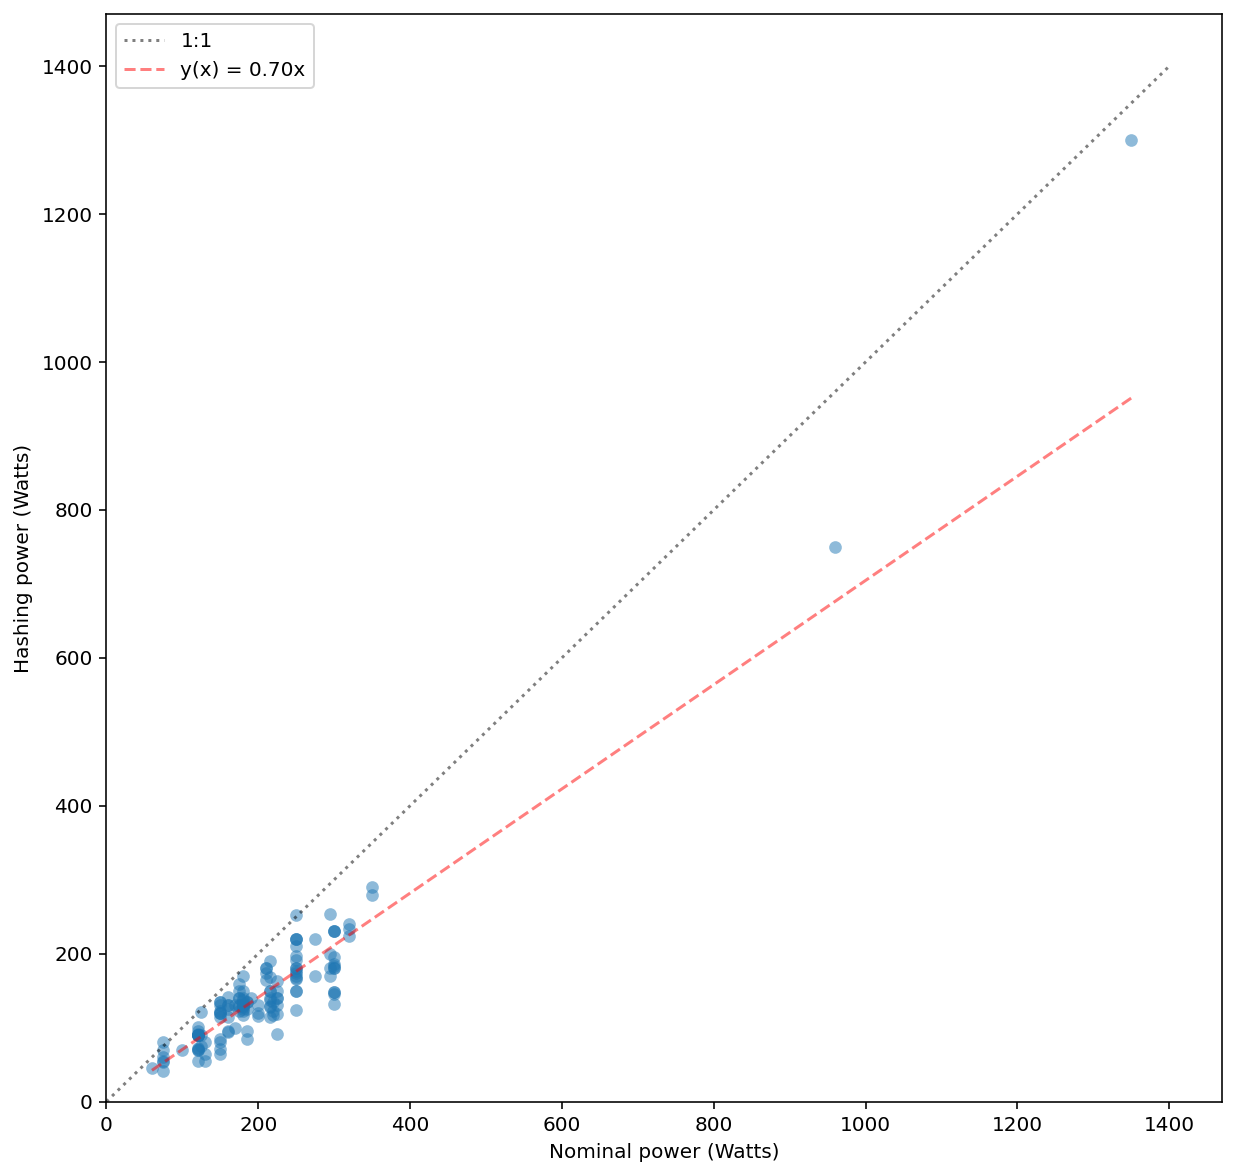

In [5]:
plt.figure(figsize=(10,10))
xs,ys = zip(*pts)
plt.scatter(xs, ys, lw=0, s=40, alpha=0.5)
plt.xlabel('Nominal power (Watts)')
plt.ylabel('Hashing power (Watts)')
plt.plot((0,1400),(0,1400),'k:', alpha=0.5, label='1:1')

z = np.divide(ys, xs).mean()
xs = np.asarray([min(xs), max(xs)])
desc = f'y(x) = {z:0.2f}x'
plt.plot(xs, xs * z,'r--', alpha=0.5, label=desc)

plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.show()

In [6]:
z

0.7046702684244777